# Code for the experiment of the paper "On the Strategyproofness of the Geometric Median"
AISTATS 2023

El-Mahdi El-Mhamdi, Sadegh Farhadkhani, Rachid Guerraoui, Le-Nguyen Hoang

In [8]:
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

The geomed method computes the geometric median of the input vectors.

In [9]:
from skfda import FDataGrid
from skfda.exploratory.stats import geometric_median
def geoMed (data, tol = 1e-08):
    sum_all = 0
    X = FDataGrid(data)
    median = geometric_median(X, tol=tol)
    return median.data_matrix[0, ..., 0]

In the following cell, we first compute the extreme achievable geometric medians for the strategic user (extreme_meidan_horizontal and extreme_meidan_vertical) in both dimensions that are used to build the target vector. We then find the strategic gain by grid search.

In [10]:
NUM_OF_POINTS = 500000
Num_OF_SRATEGIC = 5000
def strategicGain(mean, cov):
    honestPoints = np.random.multivariate_normal(mean, cov, NUM_OF_POINTS)
    GMOnlyHonest = geoMed(honestPoints)
    poisoned_horizontal = np.array([[1000,0] for t in range(Num_OF_SRATEGIC)])
    allPoisoned_horizontal = np.concatenate((honestPoints, poisoned_horizontal), axis=0)
    extreme_meidan_horizontal = geoMed(allPoisoned_horizontal)
    poisoned_vertical = np.array([[0,1000] for t in range(Num_OF_SRATEGIC)])
    allPoisoned_vertical = np.concatenate((honestPoints, poisoned_vertical), axis=0)
    extreme_meidan_vertical = geoMed(allPoisoned_vertical)
    target = np.array([extreme_meidan_horizontal[0], extreme_meidan_vertical[1]])
    
    honest_report = np.array([target for t in range(Num_OF_SRATEGIC)])
    allHonest = np.concatenate((honestPoints, honest_report), axis=0)
    trueMed = geoMed(allHonest)
    honest_distance = np.linalg.norm(trueMed-target)
    
    I = 10
    minDist = 1000000.0
    for i in range(I+1,1,-1):
        temp_strategic = [target[0], target[1]*i/I]
        strategic_vote = np.array([temp_strategic for t in range(Num_OF_SRATEGIC)])
        allStragic = np.concatenate((honestPoints, strategic_vote), axis=0)
        strategic_Med = geoMed(allStragic)
        strategic_dist = np.linalg.norm(strategic_Med-target)
        if strategic_dist < minDist:
            minDist = strategic_dist
    strategic_gain = honest_distance/minDist - 1
    return strategic_gain
    


Running the code for several seeds:

In [11]:
Num_OF_SEEDS = 2
gain_list = []
for seed in range(Num_OF_SEEDS):
    np.random.seed(seed=seed)
    cov_vals = list(range(1, 41, 3))
    gain_vals = []
    for val in cov_vals:
        mean = [0, 0]
        cov = [[val, 0], [0, 1/val]] 
        print(f'covariance: {cov}')
        gain = strategicGain(mean, cov)
        print(f'gain: {gain}')
        print('-----------------------------')
        gain_vals.append(gain)
    gain_list.append(gain_vals)

covariance: [[1, 0], [0, 1.0]]
gain: 0.0
-----------------------------
covariance: [[4, 0], [0, 0.25]]
gain: 0.036730415605759736
-----------------------------
covariance: [[7, 0], [0, 0.14285714285714285]]
gain: 0.06793115460783072
-----------------------------
covariance: [[10, 0], [0, 0.1]]
gain: 0.09065719183652043
-----------------------------
covariance: [[13, 0], [0, 0.07692307692307693]]
gain: 0.10534537933792909
-----------------------------
covariance: [[16, 0], [0, 0.0625]]
gain: 0.11916609126751854
-----------------------------
covariance: [[19, 0], [0, 0.05263157894736842]]
gain: 0.12836812598314484
-----------------------------
covariance: [[22, 0], [0, 0.045454545454545456]]
gain: 0.13979529489461773
-----------------------------
covariance: [[25, 0], [0, 0.04]]
gain: 0.15042747442125237
-----------------------------
covariance: [[28, 0], [0, 0.03571428571428571]]
gain: 0.15376927681114294
-----------------------------
covariance: [[31, 0], [0, 0.03225806451612903]]
gain

In [13]:
gain_vals = np.sum(gain_list, axis=0)/ Num_OF_SEEDS

Text(0, 0.5, 'strategic gain α')

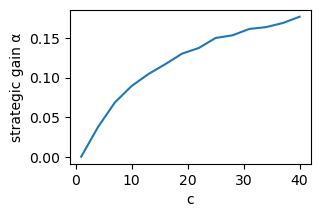

In [15]:
%matplotlib inline 
f = plt.figure()
f.set_figwidth(3.1)
f.set_figheight(2)
plt.plot(cov_vals, gain_vals)

plt.xlabel('c')
plt.ylabel('strategic gain α')
